# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [36]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt

# Решение 
1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [37]:
#aproxsimeting function
def function_exp(x):
    f_x = np.sin(x/5.0)*np.exp(x/10.0) + 5*np.exp(-x/2.0) 
    return f_x
print(function_exp(15.0))

0.6352214195786656


In [38]:
#solve w0 + w1*x0=f(x0)
a = np.array([[1.0, 1.0], [1.0, 15.0]])
b = np.array([function_exp(1.0), function_exp(15.0)])
x = np.linalg.solve(a, b)
print("Матрица A:\n", a)
print("Вектор b:\n", b)
print("Решение системы:\n", x)

def function_w1(x1):
    f_x1 = x[0]+x[1]*x1 
    return f_x1

Матрица A:
 [[ 1.  1.]
 [ 1. 15.]]
Вектор b:
 [3.25221687 0.63522142]
Решение системы:
 [ 3.43914511 -0.18692825]


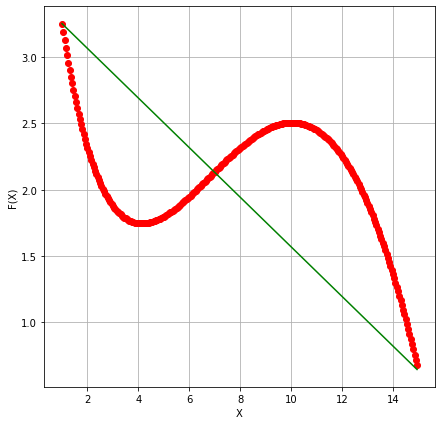

In [39]:
#plot grafic function and w1
x_ideal = list(np.arange(1.0, 15.0, 0.05))
y_ideal = []
y1 = []
for p in range(len(x_ideal)):
    y_ideal.append(function_exp(x_ideal[p]))
    y1.append(function_w1(x_ideal[p]))
plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')
plt.plot(x_ideal, y1,'g-')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid()
plt.show()

# Решение:
2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [52]:
#solve w0 + w1*x0 + w2*x0^2 =f(x0)
a1 = np.array([[1.0, 1.0, 1.0], [1.0, 8.0, 64.0], [1.0, 15.0, 225.0]])
b1 = np.array([function_exp(1.0), function_exp(8.0), function_exp(15.0)])
x2 = np.linalg.solve(a1, b1)
print("Матрица A:\n", a1)
print("Вектор b:\n", b1)
print("Решение системы:\n", x2)

def function_w2(x22):
    f_x2 = x2[0] + x2[1]*x22 + x2[2]*x22**2
    return f_x2

Матрица A:
 [[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]
Вектор b:
 [3.25221687 2.31617016 0.63522142]
Решение системы:
 [ 3.32512949 -0.06531159 -0.00760104]


280


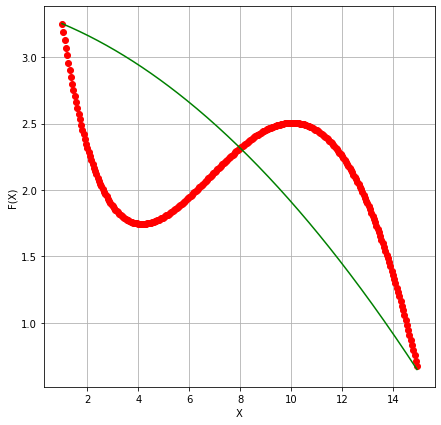

In [53]:
#plot grafic function and w2
y2 = []
for p1 in range(len(x_ideal)):
    y2.append(function_w2(x_ideal[p1]))
plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')
plt.plot(x_ideal, y2,'g-')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid()
plt.show()

# Решение:
3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [55]:
#solve w0 + w1*x0 + w2*x0^2 + w3*x0^3 =f(x0)
a2 = np.array([[1.0, 1.0, 1.0, 1.0], [1.0, 4.0, 16.0, 4.0**3], [1.0, 10.0, 100.0, 1000], [1.0, 15.0, 225.0, 15.0**3]])
b2 = np.array([function_exp(1.0), function_exp(4.0), function_exp(10.0), function_exp(15.0)])
x3 = np.linalg.solve(a2, b2)
print("Матрица A:\n", a2)
print("Вектор b:\n", b2)
print("Решение системы:\n", x3)

def function_w3(x33):
    f_x3 = x3[0] + x3[1]*x33 + x3[2]*x33**2 + x3[3]*x33**3
    return f_x3

Матрица A:
 [[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]
Вектор b:
 [3.25221687 1.74684595 2.50541641 0.63522142]
Решение системы:
 [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


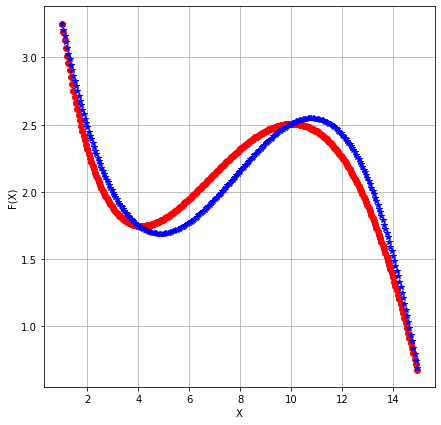

In [56]:
#plot grafic function and w3
y3 = []
for p2 in range(len(x_ideal)):
    y3.append(function_w3(x_ideal[p2]))
plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')
plt.plot(x_ideal, y3,'b*')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid()
plt.show()

# Решение
4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [71]:
# create file
file_submission2 = open("submission-2.txt", "w+") 
x3 = np.round(x3, 2)
stroka = str(x3[0]) + ' ' + str(x3[1]) + ' ' + str(x3[2]) + ' ' + str(x3[3])
print(stroka)
file_submission2.write(stroka)
file_submission2.close()



4.36 -1.3 0.19 -0.01


In [73]:
# Проверка файла
file_submission_3 = open("submission-2.txt", "r")
file_submission_3.readlines()

['4.36 -1.3 0.19 -0.01']